# 0. Presentación

En este cuaderno se realiza la etapa del ***Proceso KDD de Minería de Datos*** en este caso, aplicándola sobre la tabla de datos de casos clínicos de enfermedades infecciosas pediátricas, para la creación de un modelo de predicción de diagnóstico de estas mismas enfermedades.

Para este fin se hará uso de aprendizaje supervisado, utilizando árboles de decisión.

# 1. Librerías

Antes de iniciar cualquier tarea debemos de asegurarnos de que las librerías que sean necesarias están correctamente importadas.

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot

# Carga y manipulación de datos
from google.colab import files
import io
 
# Librería para manipular y modelos
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

# Librerías para graficar el árbol de decisión
from IPython.display import Image
import pydot
from sklearn.externals.six import StringIO
from sklearn import tree

# 2. Carga de datos

El primer paso es subir todos los archivos CSV que sean necesarios para llevar a cabo este proceso. En este caso cargamos la base de datos de casos clínicos de enfermedades infecciosas tras pasar el preprocesado de datos. Para ello utilizaremos las herramientas que nos ofrece Google Colab a la hora de subir archivos. 

In [ ]:
data = pd.read_csv("casos_clinicos_preprocesado.csv", sep=',')
data = data.drop(['Unnamed: 0'], axis = 1)
data

,Enfermedad,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,chills,joint_pain,vomiting,fatigue,weight_gain,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,cough,high_fever,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,acute_liver_failure,swelled_lymph_nodes,malaise,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,dizziness,puffy_face_and_eyes,enlarged_thyroid,swollen_extremeties,excessive_hunger,muscle_weakness,loss_of_smell,internal_itching,toxic_look_(typhos),irritability,muscle_pain,red_spots_over_body,belly_pain,dischromic_patches,receiving_unsterile_injections,stomach_bleeding,red_sore_around_nose,red_and_dry_tongue,red_skin,vascular_complications,respiratory_insufficiency,immunosuppression,insomia,itchy_anus,swollen_tonsils,red_tonsils,wheeze
0,Fungalinfection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungalinfection,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungalinfection,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungalinfection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungalinfection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,Pharyngotonsillitis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2756,Pharyngotonsillitis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2757,Pharyngotonsillitis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2758,Pharyngotonsillitis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# 3. Diviendo el conjunto de datos

Para entrenar los modelos, es necesario separar nuestro conjunto de datos  en dos partes, una para entrenar el modelo y otra de prueba para verificar si los modelos realizados obtiene resultados satisfactorios.

La variable X almacena las características del conjunto de datos y la variable Y las etiquetas clasificadoras.

In [ ]:
x = data.drop('Enfermedad', axis = 1)
y = data.Enfermedad

Establecemos que el conjunto de entrenamiento será un 70% del total del conjunto de datos, mientras que el 30% restante será usado como el conjunto de prueba.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# 4. Selección del mejor modelo

Una vez tenemos nuestro conjunto de datos dividido, llega la hora de crear el modelo predictor. Bien es sabido que los diferentes algoritmos cuentan con parámetros que permiten obtener unos resultados u otros. Por tanto, con el objetivo de quedarnos con el mejor modelo, usaremos el concepto de hiperparametrización de modelos, o lo que es lo mismo, pondremos en marcha el árbol de decisión con diferentes combinaciones de parámetros, para que nos devuelva la combinación de parámetros que ofrece un mejor resultado. Para ello, se hace uso de la función GridSearchCV.



In [ ]:
est = DecisionTreeClassifier()

# Declaramos las variables a hiperparametrizar
param = [{'criterion': ['gini', 'entropy'],
          'splitter': ['best','random'],
          'max_depth': [3,4,5,6]}]

# Inicializamos la búsqueda
grid = GridSearchCV(estimator = est, param_grid = param, cv = 5)

# Entrenamos el modelo
grid.fit(x_train,y_train)

# Mostramos los resultados
print("Mejores parámetros: ")
print(grid.best_params_)
print("Puntuaciones: ")
print(grid.cv_results_['mean_test_score'])

Mejores parámetros: 
{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
Puntuaciones: 
[0.19359227 0.19359227 0.28054786 0.28054786 0.35766157 0.35766157
 0.4016575  0.4016575  0.34006641 0.34006641 0.64493179 0.64493179
 0.85146537 0.85094857 0.92857774 0.92754415]


Por tanto, ponemos en marcha el algoritmo con dicha combinación de parámetros.

In [ ]:
DecisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, splitter = 'best')
DecisionTreeModel.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Para ver cual es la precisión de nuestro modelo, usaremos la parte de prueba de nuestro conjunto de datos. Pondremos en marcha el modelo para que cree una predicción con cada caso clínico que componga dicho conjunto de datos de entrenamiento.

In [ ]:
y_pred = DecisionTreeModel.predict(x_test)
y_pred

array(['Pepticulcerdiseae', 'Gastroenteritis', 'Impetigo',
       'Hyperthyroidism', 'Measles', 'Bronchiolitis', 'Malaria',
       'Mononucleosis', 'CommonCold', 'Influenza', 'Measles',
       'CommonCold', 'Bronchiolitis', 'Fungalinfection', 'Influenza',
       'Mononucleosis', 'Hypothyroidism', 'Malaria', 'Impetigo',
       'Tuberculosis', 'Pepticulcerdiseae', 'KawasakiDisease',
       'hepatitisA', 'Chickenpox', 'Pharyngotonsillitis', 'Impetigo',
       'CommonCold', 'Impetigo', 'Enterobiasis', 'Tuberculosis',
       'ScarletFever', 'Bronchiolitis', 'ScarletFever', 'Dengue',
       'Enterobiasis', 'Tuberculosis', 'CommonCold', 'Tuberculosis',
       'Bronchiolitis', 'Influenza', 'Gastroenteritis', 'Hypothyroidism',
       'hepatitisA', 'Measles', 'Chickenpox', 'Chickenpox',
       'Bronchiolitis', 'ScarletFever', 'Dengue', 'Pertussis',
       'CommonCold', 'Malaria', 'Hypothyroidism', 'Bronchiolitis',
       'Pneumonia', 'Bronchiolitis', 'Measles', 'Tuberculosis',
       'Hyperthyro

Y ahora, comparamos cual es el porcentaje de casos clínicos en los que nuestro modelo ha acertado. Para ello, comparamos los resultados obtenidos con los resultados reales. 

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9323671497584541

Se ha obtenido una precisión superior al 93%, lo que indica que el modelo genererado es de calidad.

# 5. Visualización del árbol

Ahora, hay que graficar el árbol para poder ver cuales son las tomas de decisiones que el modelo lleva a cabo para pronósticar los diagnósticos, y de esta forma, extraer conocimiento usabel para el Sistema Basado en el Conocimiento.

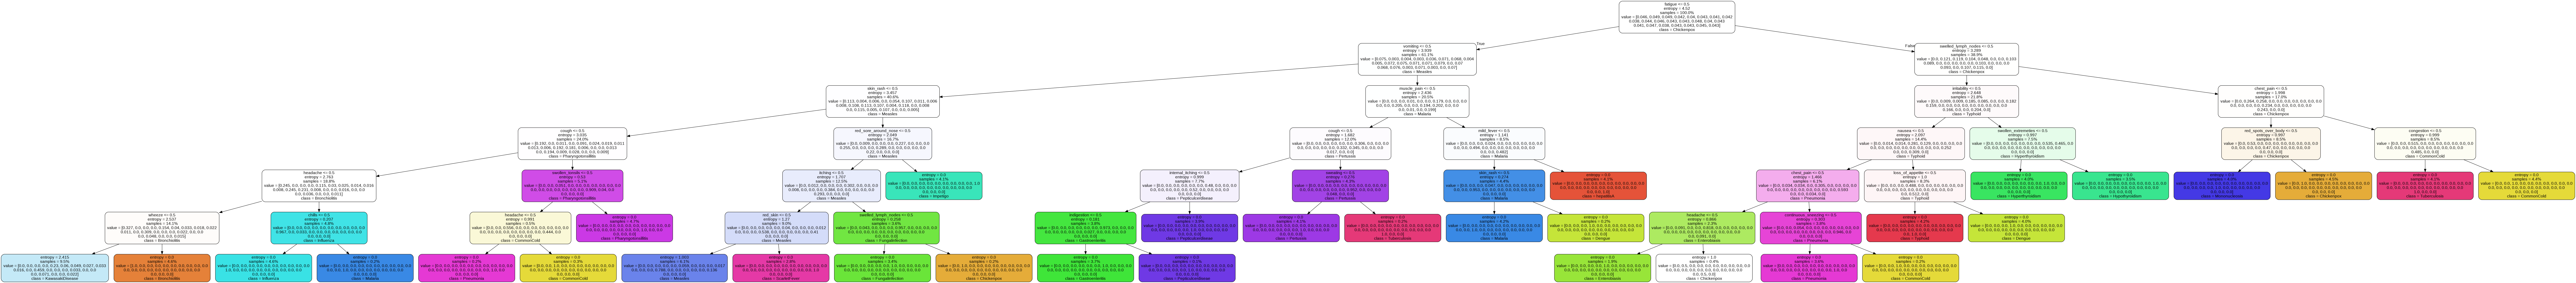

In [ ]:
dot_data = StringIO()
tree.export_graphviz(DecisionTreeModel, out_file = dot_data, proportion = True,
                     feature_names=list(data.drop(['Enfermedad'], axis=1)),
                     class_names = DecisionTreeModel.classes_, rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())